# Projeto 8: Regressão carros usados

## Etapa 1: Importação das bibliotecas

In [99]:
import pandas as pd 
import torch 
import numpy as np 
import seaborn as sns
from torch import nn, optim
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

torch.manual_seed(42)
np.random.seed(42)

## Etapa 2: Base de dados

In [50]:
base = pd.read_csv('./Bases/Bases/autos.csv', encoding='ISO-8859-1')

In [51]:
base.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [52]:
base.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [53]:
base.shape

(371528, 20)

In [54]:
base = base.drop('dateCrawled', axis=1)
base = base.drop('dateCreated', axis=1)
base = base.drop('nrOfPictures', axis=1)
base = base.drop('postalCode', axis=1)
base = base.drop('lastSeen', axis=1)

In [55]:
base.shape

(371528, 15)

In [56]:
base.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [57]:
base['name'].value_counts()

name
Ford_Fiesta                                              657
BMW_318i                                                 627
Opel_Corsa                                               622
Volkswagen_Golf_1.4                                      603
BMW_316i                                                 523
                                                        ... 
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON      1
Renault_clio_in_gold_450VB_!!                              1
Fiat_Doblo_1.6_Multijet                                    1
Renault_Laguna_1                                           1
BMW_M135i_vollausgestattet_NP_52.720____Euro               1
Name: count, Length: 233531, dtype: int64

In [58]:
base = base.drop('name', axis=1)

In [59]:
base['seller'].value_counts()

seller
privat        371525
gewerblich         3
Name: count, dtype: int64

In [60]:
base = base.drop('seller', axis=1)

In [61]:
base.shape

(371528, 13)

In [62]:
base['offerType'].value_counts()

offerType
Angebot    371516
Gesuch         12
Name: count, dtype: int64

In [63]:
base = base.drop('offerType', axis=1)

In [64]:
base.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [65]:
i1 = base.loc[base.price <= 10]

In [66]:
i1.shape

(12118, 12)

In [67]:
base = base[base.price > 10]

In [68]:
base.shape

(359410, 12)

In [69]:
i2 = base.loc[base.price > 350000]

In [70]:
base = base[base.price < 350000]

In [71]:
base.shape

(359291, 12)

In [72]:
# serve para visualizar quantidade de valores nulos, mas caro computacionalmente para que eu rode
# sns.heatmap(base.isnull())

In [73]:
base.loc[pd.isnull(base['vehicleType'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
16,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
22,2900,test,NaN,2018,manuell,90,meriva,150000,5,benzin,opel,nein
26,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
31,899,control,NaN,2016,manuell,60,clio,150000,6,benzin,renault,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371504,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [74]:
base['vehicleType'].value_counts()

vehicleType
limousine     93614
kleinwagen    78014
kombi         65921
bus           29699
cabrio        22509
coupe         18386
suv           14477
andere         3125
Name: count, dtype: int64

In [75]:
base.loc[pd.isnull(base['gearbox'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
15,450,test,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN
16,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
32,245,test,limousine,1994,NaN,0,golf,150000,2,benzin,volkswagen,nein
37,1500,test,NaN,2016,NaN,0,kangoo,150000,1,diesel,renault,nein
70,1200,test,coupe,2001,NaN,0,astra,150000,0,NaN,opel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371443,3300,control,kombi,2006,NaN,0,touran,150000,7,diesel,volkswagen,NaN
371460,3500,control,NaN,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN
371486,350,control,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN


In [76]:
base['gearbox'].value_counts()

gearbox
manuell      266547
automatik     75508
Name: count, dtype: int64

In [77]:
base.loc[pd.isnull(base['model'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
83,350,control,kleinwagen,1997,manuell,54,NaN,150000,3,NaN,fiat,ja
139,1450,control,limousine,1992,manuell,136,NaN,150000,0,NaN,audi,nein
156,6799,control,kleinwagen,2009,NaN,60,NaN,20000,5,benzin,volkswagen,nein
165,500,control,kleinwagen,1999,manuell,0,NaN,150000,0,benzin,renault,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371399,560,control,kleinwagen,2001,automatik,170,NaN,90000,0,benzin,fiat,ja
371476,9400,control,kombi,2007,manuell,200,NaN,150000,4,diesel,sonstige_autos,ja
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein


In [78]:
base['model'].value_counts()

model
golf               28989
andere             25560
3er                19905
polo               12604
corsa              12149
                   ...  
serie_2                8
rangerover             6
serie_3                3
serie_1                1
discovery_sport        1
Name: count, Length: 251, dtype: int64

In [79]:
base.loc[pd.isnull(base['fuelType'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
9,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
13,2500,control,kombi,2004,manuell,131,passat,150000,2,NaN,volkswagen,nein
26,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
36,1600,control,andere,1991,manuell,75,kadett,70000,0,NaN,opel,NaN
41,7500,control,limousine,2002,automatik,306,e_klasse,150000,4,NaN,mercedes_benz,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371496,3850,test,cabrio,2006,manuell,108,2_reihe,125000,2,NaN,peugeot,nein
371504,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [80]:
base['fuelType'].value_counts()

fuelType
benzin     217582
diesel     106002
lpg          5222
cng           557
hybrid        271
andere        165
elektro       101
Name: count, dtype: int64

In [81]:
base.loc[pd.isnull(base['notRepairedDamage'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
8,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN
9,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
12,999,control,kombi,1995,manuell,115,passat,150000,11,benzin,volkswagen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371507,5999,test,kombi,2005,manuell,140,a4,150000,4,diesel,audi,NaN
371514,999,control,cabrio,2000,manuell,95,megane,150000,4,benzin,renault,NaN
371515,1690,test,kombi,2004,manuell,55,fabia,150000,4,benzin,skoda,NaN
371523,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN


In [82]:
base['notRepairedDamage'].value_counts()

notRepairedDamage
nein    259301
ja       34004
Name: count, dtype: int64

In [83]:
valores = {'vehicleType': 'limousine', 'gearbox': 'manuell', 'model': 'golf', 'fuelType': 'benzin', 'notRepairedDamage': 'nein'}

In [84]:
base = base.fillna(value=valores)

In [85]:
base.loc[pd.isnull(base['vehicleType'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage


In [86]:
# serve para visualizar quantidade de valores nulos, mas caro computacionalmente para que eu rode
# sns.heatmap(base.isnull())

In [87]:
previsores = base.iloc[:, 1:13].values
preco_real = base.iloc[:, 0].values

In [88]:
previsores.shape, preco_real.shape

((359291, 11), (359291,))

In [89]:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0, 1, 3, 5, 8, 9, 10])], remainder='passthrough')
previsores = onehotencoder.fit_transform(previsores).toarray()

In [90]:
previsores.shape

(359291, 316)

In [91]:
previsores[0]

array([0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [92]:
type(previsores)

numpy.ndarray

In [93]:
previsores = torch.tensor(previsores, dtype=torch.float32)
preco_real = torch.tensor(preco_real, dtype=torch.float32).view(-1, 1)

## Etapa 3: Construção do modelo

In [94]:
regressor = nn.Sequential(
    nn.Linear(316, 158),
    nn.ReLU(),
    nn.Linear(158, 158),
    nn.ReLU(),
    nn.Linear(158, 1)
)

In [96]:
criterion = nn.L1Loss()
optimizer = optim.Adam(regressor.parameters())

In [98]:
dataset = torch.utils.data.TensorDataset(previsores, preco_real)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=300, shuffle=True)

## Etapa 4: Treinamento do modelo

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
regressor = regressor.to(device)

for epoch in range(100):
    running_loss = 0.
    running_mae = 0.

    for i, data in enumerate(train_loader):
        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = regressor(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_mae += F.l1_loss(outputs, labels).item()

    print('Época %3d: perda %.5f mae %.5f' % (epoch+1, running_loss / i, running_mae / i))

Época   0: perda 3093.89774 mae 3093.89774
Época   1: perda 2883.63821 mae 2883.63821
Época   2: perda 2796.80444 mae 2796.80444
Época   3: perda 2757.32466 mae 2757.32466
Época   4: perda 2711.50144 mae 2711.50144
Época   5: perda 2680.40535 mae 2680.40535
Época   6: perda 2647.43943 mae 2647.43943
Época   7: perda 2605.18893 mae 2605.18893
Época   8: perda 2585.48724 mae 2585.48724
Época   9: perda 2541.84022 mae 2541.84022
Época  10: perda 2511.60283 mae 2511.60283
Época  11: perda 2499.51975 mae 2499.51975
Época  12: perda 2485.55076 mae 2485.55076
Época  13: perda 2468.03578 mae 2468.03578
Época  14: perda 2451.98316 mae 2451.98316
Época  15: perda 2437.32003 mae 2437.32003
Época  16: perda 2431.32246 mae 2431.32246
Época  17: perda 2425.20975 mae 2425.20975
Época  18: perda 2425.89507 mae 2425.89507
Época  19: perda 2407.12052 mae 2407.12052
Época  20: perda 2411.85759 mae 2411.85759
Época  21: perda 2389.50874 mae 2389.50874
Época  22: perda 2392.82485 mae 2392.82485
Época  23: 

## Etapa 5: Avaliação do modelo

In [102]:
regressor.eval()

Sequential(
  (0): Linear(in_features=316, out_features=158, bias=True)
  (1): ReLU()
  (2): Linear(in_features=158, out_features=158, bias=True)
  (3): ReLU()
  (4): Linear(in_features=158, out_features=1, bias=True)
)

In [103]:
previsoes = regressor(previsores.to(device))

In [104]:
previsoes

tensor([[  765.0756],
        [10294.3838],
        [12145.7549],
        ...,
        [ 5250.6543],
        [ 2664.0613],
        [26845.7500]], grad_fn=<AddmmBackward0>)

In [106]:
preco_real.mean(), previsoes.mean()

(tensor(5916.8340), tensor(4903.4565, grad_fn=<MeanBackward0>))

# Projeto 10: Regressão com múltiplas saídas

## Etapa 1: Importação das bibliotecas

In [60]:
import pandas as pd
from torch import nn, optim
import torch
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt

torch.manual_seed(42) 

## Etapa 2: Base de dados

In [61]:
base = pd.read_csv('./Bases/Bases/games.csv')

In [62]:
base.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
base.shape

(16719, 16)

In [64]:
base.drop(['Other_Sales', 'Global_Sales','Developer'], inplace=True, axis=1)

In [65]:
base.shape

(16719, 13)

In [66]:
base.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN


In [67]:
#sns.heatmap(base.isnull()) # novamente, meu pc não aguenta

In [68]:
base = base.dropna(axis=0) # apaga todos os valores faltantes

In [69]:
base.shape

(6825, 13)

In [70]:
base.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,98.000000,113.000000,10665.000000


In [71]:
base = base.loc[base['NA_Sales'] > 1]

In [72]:
base.shape

(584, 13)

In [73]:
base = base.loc[base['EU_Sales'] > 1]

In [74]:
base.shape

(258, 13)

In [75]:
base.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E


In [76]:
base['Name'].value_counts()

Name
Grand Theft Auto V                 4
Assassin's Creed IV: Black Flag    3
Call of Duty: Ghosts               3
Battlefield 4                      3
The Elder Scrolls V: Skyrim        3
                                  ..
Tekken 2                           1
Destiny                            1
Cooking Mama                       1
Forza Motorsport 3                 1
The Sims: Bustin' Out              1
Name: count, Length: 223, dtype: int64

In [77]:
base = base.drop('Name', axis=1)

In [78]:
base.shape

(258, 12)

In [79]:
previsores = base.iloc[:, [0,1,2,3,7,8,9,10,11]].values
vendas = base.iloc[:, 4:7].values

In [80]:
previsores, vendas

(array([['Wii', 2006.0, 'Sports', ..., '8', 322.0, 'E'],
        ['Wii', 2008.0, 'Racing', ..., '8.3', 709.0, 'E'],
        ['Wii', 2009.0, 'Sports', ..., '8', 192.0, 'E'],
        ...,
        ['Wii', 2007.0, 'Sports', ..., '8', 124.0, 'E10+'],
        ['PS2', 2001.0, 'Racing', ..., '7.9', 46.0, 'T'],
        ['PS2', 2003.0, 'Simulation', ..., '8.4', 42.0, 'T']], dtype=object),
 array([[4.136e+01, 2.896e+01, 3.770e+00],
        [1.568e+01, 1.276e+01, 3.790e+00],
        [1.561e+01, 1.093e+01, 3.280e+00],
        [1.128e+01, 9.140e+00, 6.500e+00],
        [1.396e+01, 9.180e+00, 2.930e+00],
        [1.444e+01, 6.940e+00, 4.700e+00],
        [9.710e+00, 7.470e+00, 4.130e+00],
        [8.920e+00, 8.030e+00, 3.600e+00],
        [1.500e+01, 4.890e+00, 2.400e-01],
        [9.010e+00, 8.490e+00, 2.530e+00],
        [7.020e+00, 9.090e+00, 9.800e-01],
        [4.740e+00, 9.200e+00, 4.160e+00],
        [9.660e+00, 5.140e+00, 6.000e-02],
        [8.410e+00, 5.490e+00, 4.700e-01],
        [3.430e+

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0,2,3,8])], remainder='passthrough') #passthroug para não apagar os valores que são numericos

In [82]:
previsores = onehotencoder.fit_transform(previsores).toarray()

In [83]:
previsores.shape

(258, 61)

## Etapa 3: Construção do modelo

In [120]:
class regressor_torch(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense0 = nn.Linear(61, 128)
        self.activation = nn.Sigmoid()
        self.dense1 = nn.Linear(128, 64)
        self.dense2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 3)
    
    def forward(self, X):
        X = self.dense0(X)
        X = self.activation(X)
        X = self.dense1(X)
        X = self.activation(X)
        X = self.dense2(X)
        X = self.activation(X)
        X = self.output(X)
        return X

In [121]:
regressor = regressor_torch()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
regressor = regressor.to(device)

In [124]:
criterion = nn.MSELoss()
optimizer = optim.Adam(regressor.parameters(), lr=0.0001)

In [87]:
previsores = torch.tensor(previsores, dtype=torch.float32)
vendas = torch.tensor(vendas, dtype=torch.float32)

data_train = torch.utils.data.TensorDataset(previsores, vendas)
train_loader = torch.utils.data.DataLoader(data_train, batch_size=10, shuffle=True)

## Etapa 4: Treinamento do modelo

In [125]:
regressor.train()

for epoch in range(2000):

    running_loss = 0.
    running_mse0 = 0.
    running_mse1 = 0.
    running_mse2 = 0.

    for i, data in enumerate(train_loader):
        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = regressor(inputs)

        mse_0 = F.mse_loss(outputs[:,0], labels[:,0]).item()
        mse_1 = F.mse_loss(outputs[:,1], labels[:,1]).item()
        mse_2 = F.mse_loss(outputs[:,2], labels[:,2]).item()

        running_mse0 += mse_0 * len(inputs)
        running_mse1 += mse_1 * len(inputs)
        running_mse2 += mse_2 * len(inputs)

        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * len(inputs)


    print(f'Época {epoch+1:3d} -  Erro 1: {running_mse0:.3f} /// Erro 2: {running_mse1:.3f} /// Erro 3: {running_mse2:.3f} /// Loss {loss:.3f}')

Época   1 -  Erro 1: 5893.011 /// Erro 2: 2910.192 /// Erro 3: 432.967 /// Loss 5.040
Época   2 -  Erro 1: 5692.590 /// Erro 2: 2800.503 /// Erro 3: 417.946 /// Loss 2.589
Época   3 -  Erro 1: 5498.436 /// Erro 2: 2699.829 /// Erro 3: 403.847 /// Loss 16.685
Época   4 -  Erro 1: 5306.289 /// Erro 2: 2602.234 /// Erro 3: 390.808 /// Loss 4.105
Época   5 -  Erro 1: 5119.041 /// Erro 2: 2510.645 /// Erro 3: 379.124 /// Loss 4.241
Época   6 -  Erro 1: 4932.182 /// Erro 2: 2420.394 /// Erro 3: 368.423 /// Loss 6.442
Época   7 -  Erro 1: 4758.092 /// Erro 2: 2336.486 /// Erro 3: 358.890 /// Loss 1.671
Época   8 -  Erro 1: 4590.696 /// Erro 2: 2256.593 /// Erro 3: 350.559 /// Loss 1.192
Época   9 -  Erro 1: 4438.585 /// Erro 2: 2184.938 /// Erro 3: 343.601 /// Loss 5.458
Época  10 -  Erro 1: 4296.226 /// Erro 2: 2115.693 /// Erro 3: 336.754 /// Loss 1.540
Época  11 -  Erro 1: 4177.449 /// Erro 2: 2057.479 /// Erro 3: 331.340 /// Loss 0.566
Época  12 -  Erro 1: 4059.134 /// Erro 2: 1998.794 //

## Etapa 5: Avaliação

In [126]:
regressor.eval()

previsao = regressor(previsores)

previsao

tensor([[18.2039, 13.6459,  5.1289],
        [16.8909, 12.6429,  4.7386],
        [16.1172, 12.0873,  4.5958],
        [ 9.7178,  7.2535,  2.6834],
        [ 8.6156,  6.4431,  2.3915],
        [11.9424,  8.9265,  3.3410],
        [11.4701,  8.5729,  3.2071],
        [10.4756,  7.8531,  2.9754],
        [ 7.4599,  5.5741,  2.0439],
        [ 7.1935,  5.3955,  2.0036],
        [ 6.3527,  4.4606,  0.8774],
        [ 4.5925,  3.4306,  1.2047],
        [ 5.8744,  4.1066,  0.7527],
        [ 7.1817,  5.3151,  1.8334],
        [ 4.3209,  3.2259,  1.1206],
        [ 5.7643,  4.2949,  1.5302],
        [ 4.9480,  3.4389,  0.5626],
        [ 6.7925,  4.9048,  1.3789],
        [ 4.1976,  3.0405,  0.8472],
        [ 3.9244,  2.6791,  0.3098],
        [ 3.8973,  2.6572,  0.2948],
        [ 4.4713,  3.0814,  0.4225],
        [ 6.2545,  4.6246,  1.5744],
        [ 5.0305,  3.6034,  0.9284],
        [ 5.6314,  4.1743,  1.4401],
        [ 3.9853,  2.8715,  0.7556],
        [ 4.1827,  2.8632,  0.3504],
 

In [127]:
previsao = previsao.detach().numpy()

In [128]:
previsao

array([[18.203932  , 13.645912  ,  5.1288853 ],
       [16.890858  , 12.642855  ,  4.738574  ],
       [16.117153  , 12.087257  ,  4.595808  ],
       [ 9.717754  ,  7.2534947 ,  2.6833987 ],
       [ 8.615599  ,  6.4431424 ,  2.3914907 ],
       [11.94244   ,  8.926472  ,  3.3410416 ],
       [11.470064  ,  8.572888  ,  3.2070904 ],
       [10.475624  ,  7.853076  ,  2.9753845 ],
       [ 7.4598618 ,  5.5740647 ,  2.043932  ],
       [ 7.1934977 ,  5.3955173 ,  2.0035675 ],
       [ 6.352651  ,  4.460623  ,  0.8773968 ],
       [ 4.5924745 ,  3.4306107 ,  1.204687  ],
       [ 5.8743834 ,  4.1066403 ,  0.75272465],
       [ 7.181685  ,  5.3151135 ,  1.8334148 ],
       [ 4.3209352 ,  3.2258735 ,  1.1206427 ],
       [ 5.7642627 ,  4.2948923 ,  1.5302289 ],
       [ 4.947958  ,  3.4388862 ,  0.5625622 ],
       [ 6.7925043 ,  4.90481   ,  1.3789225 ],
       [ 4.1975856 ,  3.0404997 ,  0.8472307 ],
       [ 3.9244413 ,  2.679101  ,  0.3097559 ],
       [ 3.8972664 ,  2.6571584 ,  0.294

In [129]:
previsao.mean(axis=0)

array([3.3807209, 2.4400575, 0.6306035], dtype=float32)

In [130]:
vendas.mean(axis=0)

tensor([3.2838, 2.3505, 0.5862])

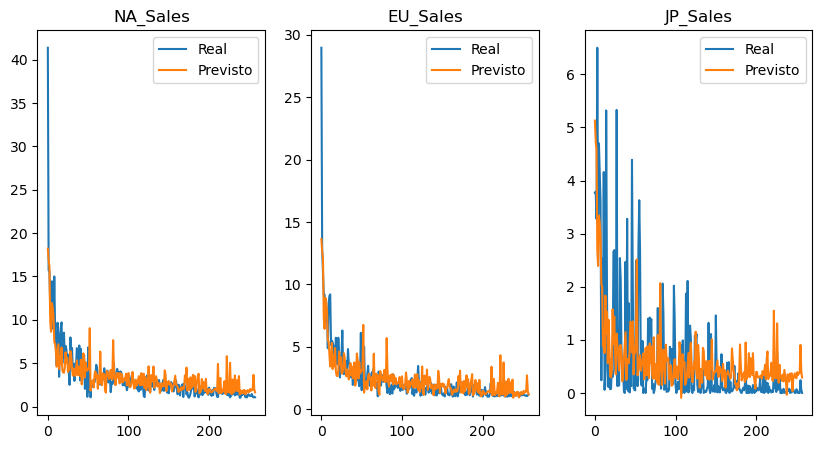

In [131]:
fis, ax = plt.subplots(1, 3, figsize=(10, 5))
for i in range(3):
    ax[i].plot(vendas[:,i])
    ax[i].plot(previsao[:,i])
    ax[i].legend(['Real', 'Previsto'])
    ax[i].set_title(base.columns[i+4])
plt.show()